In [80]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patches as patches
import seaborn as sns

In [23]:
### Different source references

# Get top scorers in Ligue 1 (ID season = 4242)
url_topscorers = "https://elenasport-io1.p.rapidapi.com/v2/seasons/4242/topscorers"

# Get all the leagues available
url_leagues = "https://elenasport-io1.p.rapidapi.com/v2/leagues"

# Get data for Ligue 1 (ID = 263)
url_league_id = "https://elenasport-io1.p.rapidapi.com/v2/leagues/263"

# Get all the seasons available
url_season = "https://elenasport-io1.p.rapidapi.com/v2/seasons"

# Get the current players in Ligue 1 2021 - 2022
url_players = "https://elenasport-io1.p.rapidapi.com/v2/seasons/4242/players"

# Get the current teams in Ligue 1 2021 - 2022
url_teams = "https://elenasport-io1.p.rapidapi.com/v2/seasons/4242/teams"

# Get all the fixtures in Ligue 1 2021 - 2022
url_fixtures_season = "https://elenasport-io1.p.rapidapi.com/v2/seasons/4242/fixtures"

In [24]:
def collect_data(url):
    """
    function to collect all the produced from that API
    input: url (The reference to the desired data to be collected)
    output: data table of collected sets of data.
    """
    querystring = {"page":"1"}
    headers = {
    'x-rapidapi-host': "elenasport-io1.p.rapidapi.com",
    'x-rapidapi-key': "cb14262847mshe798c0747c3377dp1c69c1jsn5a1503e54748"
    }
    i = 2
    response = requests.request("GET", url, headers=headers, params=querystring)
    response_list = response.json()["data"]
    response_df = pd.DataFrame(response_list)
    while response.status_code == 200 and response.json()["pagination"]["hasNextPage"] == True:
        querystring = {"page":str(i)}
        response = requests.request("GET", url, headers=headers, params=querystring)
        try:
            response_df = response_df.append(pd.DataFrame(response.json()["data"]), ignore_index=True)
            #print(response.json()["data"])
            print("page:", i)
            i += 1
        except:
            continue
    return response_df

In [33]:
##Collect data from sources

data_topscorers = collect_data(url_topscorers)
#data_leagues = collect_data(url_leagues)
#data_season = collect_data(url_season)
#data_players = collect_data(url_players)
#data_teams = collect_data(url_teams)
#data_fixtures_season = collect_data(url_fixtures_season)
#data_upcoming_fixtures = collect_data(url_upcoming_fixtures)

page: 2
page: 3
page: 4
page: 5
page: 6
page: 7
page: 8


### LIST OF COMMANDS
##### This represents the list of the different commands to be applied by the bot on discord


1. Top 10 top scorers of Ligue 1 2021-2022
- Data used: URL Topscorers data
- Visualization: Horizontal Bar Chart

2. % of wins, defeats and draws for Lille in Ligue 1 2021-2022
- Visualization: Pie Chart
      
3. Total number of homewins versus awaywins in Ligue 1 2021-2022
- Visualization: Histogram

4. Total number of wins per team in Ligue 1 2021-2022

5. Performances of Lille at home and away in Ligue 1 2021-022

6. Current ranking Ligue 1 2021-2022

In [316]:
# Display all the leagues available
print(data_leagues)

# Get the ID of the Ligue 1 season 2021 - 2022
print(data_season[data_season['idLeague']==263])

      id countryName              name  nationalLeague  clubsLeague
0    116     Belarus       1. Division            True         True
1    215      Cyprus       1. Division            True         True
2    381      Norway       1. Division            True         True
3    224     Denmark      1st Division            True         True
4    273     Germany     2. Bundesliga            True         True
..   ...         ...               ...             ...          ...
195  300     Iceland       Úrvalsdeild            True         True
196  256     Finland     Veikkausliiga            True         True
197  340      Latvia          Virsliga            True         True
198  517     Vietnam        V.League 1            True         True
199  115     Belarus  Vysheyshaya Liga            True         True

[200 rows x 5 columns]
      id  idLeague           leagueName  start   end
60  4242       263  Ligue 1 - 2021/2022   2021  2022


In [260]:
# Display all the leagues available in France
data_leagues.loc[data_leagues['countryName'] == 'France']

,id,idCountry,countryName,name,nationalLeague,clubsLeague
48,268,31.0,France,Coupe de France,True,True
100,263,31.0,France,Ligue 1,True,True
101,264,31.0,France,Ligue 2,True,True


In [264]:
# Display all the teams in Ligue 1 in season 2021-2022
data_teams

,id,name,fullName,country,founded,officialPage,phone,email,address,badgeURL
0,942,Angers,Angers SCO,France,1919,http://www.angers-sco.fr,+33 (892) 390 820,angers-sco@wanadoo.fr,"73, boulevard Jacques PortetAngers",https://cdn.elenasport.io/badges/150x150/942
1,937,Bordeaux,FC Girondins de Bordeaux,France,1881,http://www.girondins.com,+33 (89) 268 3433,contact@girondins.com,Rue Joliot Curie 33187Le Haillan,https://cdn.elenasport.io/badges/150x150/937
2,958,Brest,Stade Brestois 29,France,1950,http://www.sb29.com,+33 (29) 802 2030,info@stade-brestois.com,Rue du Bot42005Brest,https://cdn.elenasport.io/badges/150x150/958
3,959,Clermont,Clermont Foot 63,France,1990,http://www.clermontfoot.com,+33 (47) 325 7902,clermont-foot@caramail.com,"4, rue Adrien MabrutClermont-Ferrand",https://cdn.elenasport.io/badges/150x150/959
4,999,Lens,Racing Club de Lens,France,1906,http://www.rclens.fr,+33 (32) 113 2132,contact@rclens.fr,"33, rue Arthur Lamendin62210Avion",https://cdn.elenasport.io/badges/150x150/999
5,930,Lille,Lille OSC Métropole,France,1944,http://www.losc.fr,+33 (32) 017 7177,contact@losc.fr,"261, boulevard de Tournai59044Villeneuve-d'Ascq",https://cdn.elenasport.io/badges/150x150/930
6,947,Lorient,FC Lorient,France,1926,http://www.fclweb.fr,+33 (29) 735 1500,webmaster@fclweb.fr,Espace FCL - Kerlir - CS 3013156104Ploemeur,https://cdn.elenasport.io/badges/150x150/947
7,1036,Metz,FC Metz,France,1932,http://www.fcmetz.com,+33 (38) 766 7215,fcmetz@fcmetz.com,"3, allée Saint-Symphorien57000Metz",https://cdn.elenasport.io/badges/150x150/1036
8,940,Monaco,AS Monaco FC,Monaco,1919,http://www.asm-fc.com,+377 9205 7473,info@asm-fc.com,"7, avenue des Castelans98014Monaco",https://cdn.elenasport.io/badges/150x150/940
9,932,Montpellier,Montpellier HSC,France,1974,http://www.mhscfoot.com,+33 (46) 715 4600,mhsc@mhscfoot.com,Domaine de Grammont34070Montpellier,https://cdn.elenasport.io/badges/150x150/932


In [71]:
# Display all the current players in Ligue 1 2021 - 2022
data_players

,id,name,nationalities,fullName,pob,dob,height,weight,foot,photoURL
0,57,A. Limbombe,[Belgium],Anthony Limbombe Ekango,Mechelen,1994-07-15,177.0,72.0,right,https://cdn.elenasport.io/players/150x150/57
1,77,J. Uronen,[Finland],Jere Uronen,Turku,1994-07-13,177.0,75.0,left,https://cdn.elenasport.io/players/150x150/77
2,91,W. Faes,[Belgium],Wout Faes,None,1998-04-03,187.0,84.0,right,https://cdn.elenasport.io/players/150x150/91
3,99,G. Biancone,[France],Giulian Biancone,None,2000-03-31,187.0,NaN,right,None
4,100,K. Dabila,[Côte d'Ivoire],Kouadio Yves Dabila,None,1997-01-01,183.0,NaN,None,https://cdn.elenasport.io/players/150x150/100
...,...,...,...,...,...,...,...,...,...,...
195,16001,Lucas Paquetá,[Brazil],Lucas Tolentino Coelho de Lima,Rio de Janeiro,1997-08-27,180.0,72.0,left,https://cdn.elenasport.io/players/150x150/16001
196,16003,Pau López,[Spain],Pau López Sabata,Girona,1994-12-13,189.0,77.0,left,https://cdn.elenasport.io/players/150x150/16003
197,16006,J. Kluivert,[Netherlands],Justin Kluivert,Amsterdam,1999-05-05,171.0,66.0,right,https://cdn.elenasport.io/players/150x150/16006
198,16073,A. Milik,[Poland],Arkadiusz Milik,Tychy,1994-02-28,186.0,80.0,left,https://cdn.elenasport.io/players/150x150/16073


In [42]:
# Display all the fixtures (=games) in Ligue 1 season 2021 - 2022
data_fixtures_season

# Add final score column in the dataframe representing the fixtures in the Ligue 1 2021-2022
data_fixtures_season['finalScore'] = data_fixtures_season['team_home_90min_goals'].astype(str) + ['-'] + data_fixtures_season['team_away_90min_goals'].astype(str)

# Add final result column in the dataframe (winning team, losing team, draw) 
data_fixtures_season = data_fixtures_season.copy()

data_fixtures_season['finalResult'] = np.where(data_fixtures_season['team_home_90min_goals']
 == data_fixtures_season['team_away_90min_goals'], 'Draw', np.where(data_fixtures_season['team_home_90min_goals'] > 
 data_fixtures_season['team_away_90min_goals'], data_fixtures_season['homeName'], data_fixtures_season['awayName']))

# Add halftime_score column in the dataframe
data_fixtures_season['halftimeScore'] = data_fixtures_season['team_home_1stHalf_goals'].astype(str) + ['-'] + data_fixtures_season['team_away_1stHalf_goals'].astype(str)

# Add points earned by home team column

data_fixtures_season['pts_earned_homeName'] = np.where(data_fixtures_season['homeName']
 == data_fixtures_season['finalResult'], 3 , np.where(data_fixtures_season['awayName'] ==
 data_fixtures_season['finalResult'], 0, 1))

# Add points earned by away team column

data_fixtures_season['pts_earned_awayName'] = np.where(data_fixtures_season['awayName']
 == data_fixtures_season['finalResult'], 3 , np.where(data_fixtures_season['homeName'] ==
 data_fixtures_season['finalResult'], 0, 1))

# Present all the finished fixtures with the final result column created above

data_fixtures_ligue1 = data_fixtures_season[['id', 'seasonName','idHome', 'homeName', 'idAway', 'awayName','halftimeScore', 
'team_home_90min_goals', 'team_away_90min_goals', 'finalScore','finalResult', 'pts_earned_homeName', 'pts_earned_awayName', 'attendance', 'venueName', 'date', 'status']]
data_finished_fixtures_ligue1 = data_fixtures_ligue1[data_fixtures_ligue1['status'] == 'finished']
data_finished_fixtures_ligue1

,id,seasonName,idHome,homeName,idAway,awayName,halftimeScore,team_home_90min_goals,team_away_90min_goals,finalScore,finalResult,pts_earned_homeName,pts_earned_awayName,attendance,venueName,date,status
0,228030,Ligue 1 - 2021/2022,940,Monaco,931,Nantes,1-1,1,1,1-1,Draw,1,1,7500.0,Stade Louis II.,2021-08-06 19:00:00,finished
1,228031,Ligue 1 - 2021/2022,939,Olympique Lyonnais,958,Brest,0-1,1,1,1-1,Draw,1,1,29018.0,Parc Olympique Lyonnais,2021-08-07 15:00:00,finished
2,228032,Ligue 1 - 2021/2022,936,Troyes,948,PSG,1-2,1,2,1-2,PSG,0,3,15248.0,Stade de l'Aube,2021-08-07 19:00:00,finished
3,228033,Ligue 1 - 2021/2022,945,Rennes,999,Lens,1-1,1,1,1-1,Draw,1,1,22567.0,Roazhon Park,2021-08-08 11:00:00,finished
4,228035,Ligue 1 - 2021/2022,941,Saint-Étienne,947,Lorient,0-0,1,1,1-1,Draw,1,1,20641.0,Stade Geoffroy-Guichard,2021-08-08 13:00:00,finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,228214,Ligue 1 - 2021/2022,936,Troyes,958,Brest,0-1,1,1,1-1,Draw,1,1,NaN,None,2021-12-22 20:00:00,finished
185,228215,Ligue 1 - 2021/2022,932,Montpellier,942,Angers,2-1,4,1,4-1,Montpellier,3,0,NaN,None,2021-12-22 20:00:00,finished
186,228217,Ligue 1 - 2021/2022,937,Bordeaux,930,Lille,2-1,2,3,2-3,Lille,0,3,NaN,None,2021-12-22 20:00:00,finished
187,228218,Ligue 1 - 2021/2022,941,Saint-Étienne,931,Nantes,0-0,0,1,0-1,Nantes,0,3,NaN,None,2021-12-22 20:00:00,finished


In [ ]:
# Informations available regarding the fixtures
data_fixtures_season.keys()

Index(['id', 'idCountry', 'countryName', 'idLeague', 'leagueName', 'idSeason',
       'seasonName', 'idHome', 'homeName', 'idAway', 'awayName', 'idStage',
       'idVenue', 'venueName', 'date', 'status', 'round', 'attendance',
       'team_home_90min_goals', 'team_away_90min_goals', 'team_home_ET_goals',
       'team_away_ET_goals', 'team_home_PEN_goals', 'team_away_PEN_goals',
       'team_home_1stHalf_goals', 'team_away_1stHalf_goals',
       'team_home_2ndHalf_goals', 'team_away_2ndHalf_goals', 'elapsed',
       'elapsedPlus', 'eventsHash', 'lineupsHash', 'statsHash', 'referees',
       'newfinalResult', 'finalResult', 'finalScore', 'halftimeScore',
       'pts_homeName', 'pts_earned_homeName', 'pts_earned_awayName'],
      dtype='object')

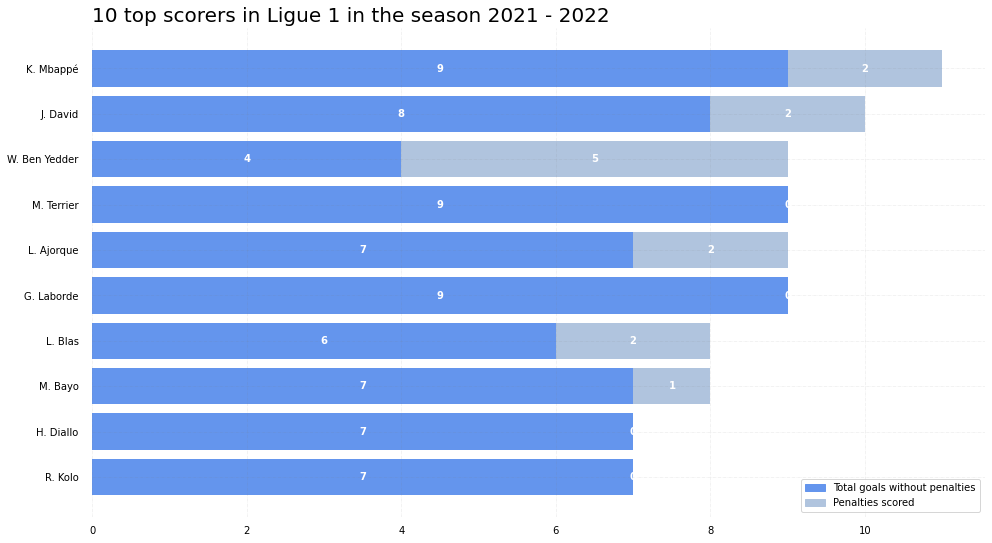

In [34]:
### FIRST COMMAND

## Get the top 10 topscorers in Ligue 1 season 2021 - 2022
data_10_topscorers = data_topscorers.sort_values(by=['totalGoals'], ascending = False)[1:11]

## Visualize the top 10 topscorers in Ligue 1 season 2021 - 2022 in an horizontal bar charts
players = data_10_topscorers['playerName']
total_goals_without_penalties = data_10_topscorers['totalGoals'] - data_10_topscorers['penaltiesScored']
penalties_scored = data_10_topscorers['penaltiesScored']
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
# Horizontal Bar Plot
b1 = ax.barh(players, total_goals_without_penalties, color = 'cornflowerblue')
b2 = ax.barh(players, penalties_scored, left = total_goals_without_penalties, color = 'lightsteelblue')
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(int(width), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', color='white', fontweight ='bold')
# Add Plot Title
ax.set_title('10 top scorers in Ligue 1 in the season 2021 - 2022', loc ='left', fontsize=20)

blue_patch = mpatches.Patch(color='cornflowerblue', label='Total goals without penalties')
orange_patch = mpatches.Patch(color='lightsteelblue', label='Penalties scored')
ax.legend(handles=[blue_patch, orange_patch])

plt.show()

In [28]:
### Prepare data for visualize

# Get the finished home fixtures of team Lille in Ligue 1 season 2021 - 2022
data_finished_homefixtures_lille = data_finished_fixtures_ligue1[data_finished_fixtures_ligue1['homeName'] == 'Lille']
# Add finalResultLille column in the dataframe presenting finished home fixtures of team Lille in Ligue 1 season 2021 - 2022
data_finished_homefixtures_lille['homefinalResultLille'] = np.where(data_finished_homefixtures_lille['pts_earned_homeName']
 == 3, 'Win' , np.where(data_finished_homefixtures_lille['pts_earned_homeName'] == 0, 'Defeat', 'Draw'))

data_finished_homefixtures_lille

# Get the finished away fixtures of team Lille in Ligue 1 season 2021 - 2022
data_finished_awayfixtures_lille = data_finished_fixtures_ligue1[data_finished_fixtures_ligue1['awayName'] == 'Lille']
# Add finalResultLille column in the dataframe presenting finished away fixtures of team Lille in Ligue 1 season 2021 - 2022
data_finished_awayfixtures_lille['awayfinalResultLille'] = np.where(data_finished_awayfixtures_lille['pts_earned_awayName']
 == 3, 'Win' , np.where(data_finished_awayfixtures_lille['pts_earned_awayName'] == 0, 'Defeat', 'Draw'))

data_finished_awayfixtures_lille

# Get all the finished fixtures of team Lille in season 2021 - 2022 by concatening 
data_all_finished_fixtures_lille = pd.concat([data_finished_homefixtures_lille, data_finished_awayfixtures_lille], axis=0)
data_all_finished_fixtures_lille_by_date = data_all_finished_fixtures_lille.sort_values(by=['date'])

data_all_finished_fixtures_lille


<ipython-input-28-159174a69af3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_finished_homefixtures_lille['homefinalResultLille'] = np.where(data_finished_homefixtures_lille['pts_earned_homeName']
<ipython-input-28-159174a69af3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_finished_awayfixtures_lille['awayfinalResultLille'] = np.where(data_finished_awayfixtures_lille['pts_earned_awayName']


,id,seasonName,idHome,homeName,idAway,awayName,halftimeScore,team_home_90min_goals,team_away_90min_goals,finalScore,finalResult,pts_earned_homeName,pts_earned_awayName,attendance,venueName,date,status,homefinalResultLille,awayfinalResultLille
11,228041,Ligue 1 - 2021/2022,930,Lille,933,Nice,0-3,0,4,0-4,Nice,0,3,30144.0,Stade Pierre-Mauroy,2021-08-14 15:00:00,finished,Defeat,NaN
38,228068,Ligue 1 - 2021/2022,930,Lille,932,Montpellier,1-1,2,1,2-1,Lille,3,0,NaN,Stade Pierre-Mauroy,2021-08-29 15:00:00,finished,Win,NaN
61,228092,Ligue 1 - 2021/2022,930,Lille,946,Reims,2-0,2,1,2-1,Lille,3,0,32604.0,Stade Pierre-Mauroy,2021-09-22 17:00:00,finished,Win,NaN
88,228114,Ligue 1 - 2021/2022,930,Lille,934,Olympique Marseille,1-0,2,0,2-0,Lille,3,0,None,Stade Pierre-Mauroy,2021-10-03 15:05:00,finished,Win,NaN
102,228138,Ligue 1 - 2021/2022,930,Lille,958,Brest,1-1,1,1,1-1,Draw,1,1,NaN,None,2021-10-23 19:00:00,finished,Draw,NaN
121,228153,Ligue 1 - 2021/2022,930,Lille,942,Angers,1-0,1,1,1-1,Draw,1,1,33305.0,None,2021-11-06 16:00:00,finished,Draw,NaN
141,228170,Ligue 1 - 2021/2022,930,Lille,931,Nantes,1-1,1,1,1-1,Draw,1,1,NaN,None,2021-11-27 16:00:00,finished,Draw,NaN
161,228196,Ligue 1 - 2021/2022,930,Lille,936,Troyes,0-1,2,1,2-1,Lille,3,0,NaN,None,2021-12-04 18:00:00,finished,Win,NaN
173,228205,Ligue 1 - 2021/2022,930,Lille,939,Olympique Lyonnais,0-0,0,0,0-0,Draw,1,1,NaN,None,2021-12-12 12:00:00,finished,Draw,NaN
8,228038,Ligue 1 - 2021/2022,1036,Metz,930,Lille,2-1,3,3,3-3,Draw,1,1,15551.0,Stade Saint-Symphorien,2021-08-08 15:00:00,finished,NaN,Draw


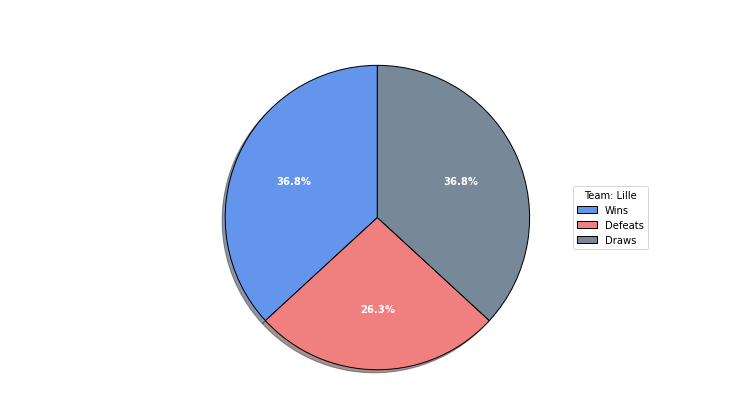

In [36]:
## SECOND COMMAND

number_wins_lille = data_all_finished_fixtures_lille.finalResult.value_counts().Lille
number_draws_lille = data_all_finished_fixtures_lille.finalResult.value_counts().Draw
number_defeats_lille = len(data_all_finished_fixtures_lille) - (number_wins_lille + number_draws_lille)

labels = ("Wins", "Defeats", "Draws")
data = [number_wins_lille, number_defeats_lille, number_draws_lille]
#explode = (0.1, 0.1, 0.1)

# Creating color parameters
colors = ( "cornflowerblue", "lightcoral", "lightslategrey")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  #explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="white"))
 
# Adding legend
ax.legend(wedges, labels,
          title ="Team: Lille",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 10, weight ="bold")
plt.title("Percentage of wins, defeats, draws of Lille in Ligue 1 2021 - 2022", size = 20, color = 'white', weight = 'bold')
plt.show()

Text(0.5, 1.0, 'Total number of homewins vs awaywins in Ligue 1 2021 - 2022')

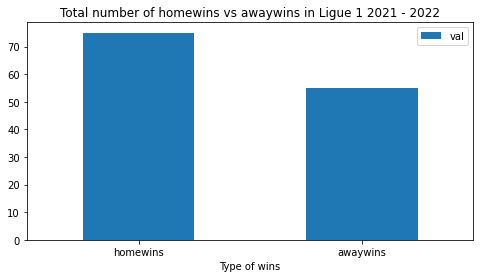

In [168]:
## THIRD COMMAND 

# number of home wins in Ligue 1 - 2021/2022
number_homeWins = len(data_finished_fixtures_ligue1[data_finished_fixtures_ligue1['homeName'] == data_finished_fixtures_ligue1['finalResult']])

# number of away wins in Ligue 1 - 2021/2022
number_awayWins = len(data_finished_fixtures_ligue1[data_finished_fixtures_ligue1['awayName'] == data_finished_fixtures_ligue1['finalResult']])

# number of draws in Ligue 1 - 2021/2022
number_draws = len(data_finished_fixtures_ligue1[data_finished_fixtures_ligue1['finalResult'] == 'Draw'])

# Plot total number of homewins vs awaywins 
total_nb_homewins_and_awaywins = pd.DataFrame({'Type of wins':['homewins', 'awaywins'], 'val':[number_homeWins, number_awayWins]})
total_nb_homewins_and_awaywins.plot.bar(x='Type of wins', y='val', rot=0, figsize=(8,4))
plt.title('Total number of homewins vs awaywins in Ligue 1 2021 - 2022')

Text(0.5, 1.0, 'Total number of wins per team')

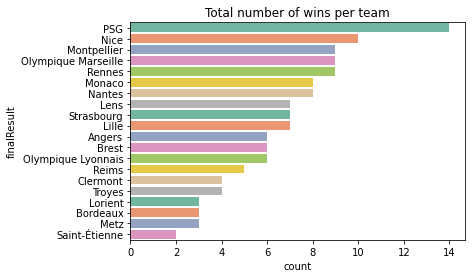

In [31]:
## FOURTH COMMAND

# Plot total number of wins per team in Ligue 1 2021 - 2022
sns.countplot(y="finalResult", data=data_finished_fixtures_ligue1, order=data_finished_fixtures_ligue1.finalResult.value_counts().iloc[1:].index, palette='Set2')
plt.title('Total number of wins per team')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


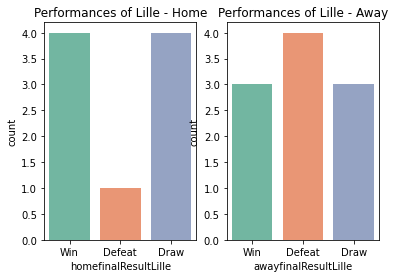

In [41]:
## FIFTH COMMAND

# Analyze the performances of Lille at home and away
fig, ax =plt.subplots(1,2)
order = ['Win', 'Defeat', 'Draw']
sns.countplot(data_finished_homefixtures_lille['homefinalResultLille'], ax=ax[0], order=order, palette='Set2').set(title='Performances of Lille - Home')
sns.countplot(data_finished_awayfixtures_lille['awayfinalResultLille'], ax=ax[1], order=order, palette='Set2').set(title='Performances of Lille - Away')
plt.show()

homeName
PSG                    46
Nice                   33
Olympique Marseille    32
Rennes                 31
Montpellier            31
Monaco                 29
Nantes                 28
Lille                  28
Lens                   27
Strasbourg             26
Olympique Lyonnais     25
Angers                 25
Brest                  25
Reims                  23
Bordeaux               17
Clermont               17
Troyes                 17
Metz                   16
Lorient                16
Saint-Étienne          12
dtype: int64


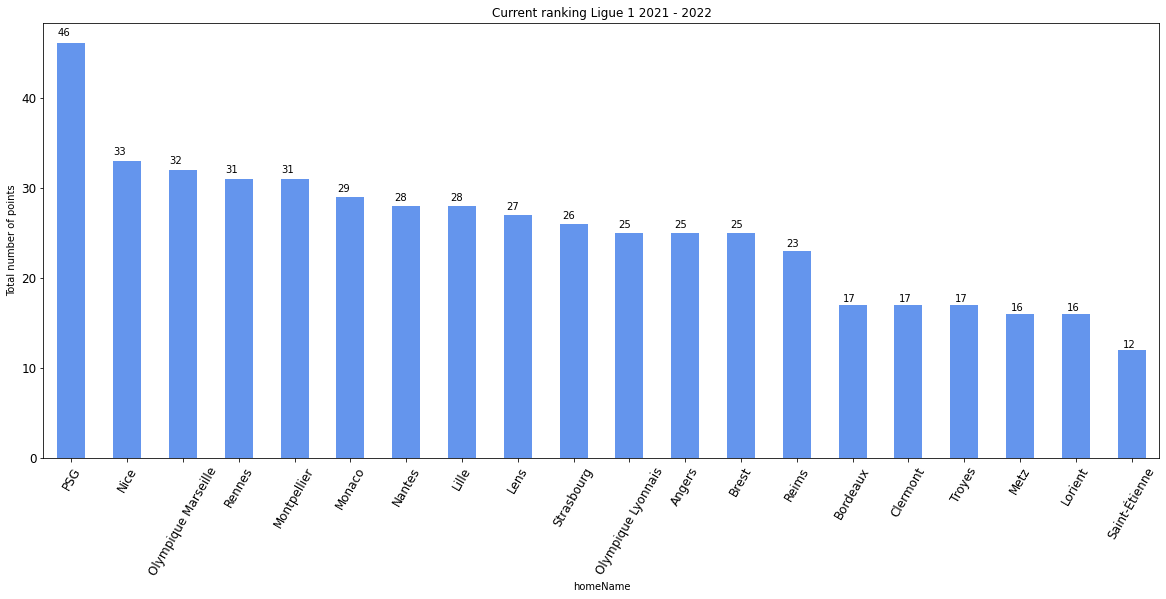

In [162]:
## SIXTH COMMAND

# Total number of points earned by each team at home in Ligue 1 2021-2022
total_pts_earned_at_home_per_team = data_finished_fixtures_ligue1.groupby('homeName').sum()
total_pts_earned_at_home_per_team['pts_earned_homeName']
# Total number of points earned by each team away in Ligue 1 2021-2022
total_pts_earned_away_per_team = data_finished_fixtures_ligue1.groupby('awayName').sum()
total_pts_earned_away_per_team['pts_earned_awayName']
# Current ranking Ligue 1 2021-2022
total_pts_earned_each_team = total_pts_earned_at_home_per_team['pts_earned_homeName']+total_pts_earned_away_per_team['pts_earned_awayName']
ranking_ligue1_current_season = total_pts_earned_each_team.sort_values(ascending=False)

print(ranking_ligue1_current_season)

# Plot current ranking Ligue 1 2021-2022
ax = ranking_ligue1_current_season.plot.bar(x='Teams', 
                                        rot=60, 
                                        figsize=(20,8), 
                                        title='Current ranking Ligue 1 2021 - 2022',
                                        ylabel='Total number of points',
                                        color='cornflowerblue',
                                        fontsize='large')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.02))